<a href="https://colab.research.google.com/github/shrutibist01/alzheimersprediction/blob/main/Final_Alzheimers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support

Models:

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

XGBoost:

In [3]:
!pip install xgboost
import xgboost as xgb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.1 MB/s eta 0:00:00a 0:00:01


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Understanding the data

In [ ]:
df = pd.read_csv('/content/alzheimers_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


EDA: Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [ ]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#for counting duplicate rows
sum(df.duplicated())

0

In [ ]:
#checking for null
df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


So, there are no duplicated or null values.

In [ ]:
#dropping columns that are not required
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

In [ ]:
print(df["Diagnosis"].value_counts())

Diagnosis
0    1389
1     760
Name: count, dtype: int64


In [ ]:
class_counts = df["Diagnosis"].value_counts(normalize=True) * 100

In [ ]:
print(class_counts)

Diagnosis
0    64.634714
1    35.365286
Name: proportion, dtype: float64


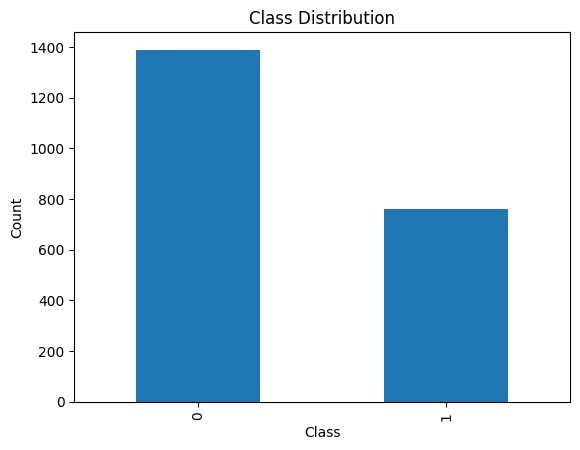

In [ ]:
df["Diagnosis"].value_counts().plot(kind="bar")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

In [ ]:
from collections import Counter

In [ ]:
counts = Counter(df["Diagnosis"])
imbalance_ratio = max(counts.values()) / min(counts.values())
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

Imbalance Ratio: 1.83


In [ ]:
#identify numerical columns: columns with more than 10 unique values are considered numerical
numerical_columns = [col for col in df.columns if df[col].nunique() > 10]

#identify categorical columns: columns that are not numerical and not diagnosis
categorical_columns = df.columns.difference(numerical_columns).difference(['Diagnosis']).to_list()

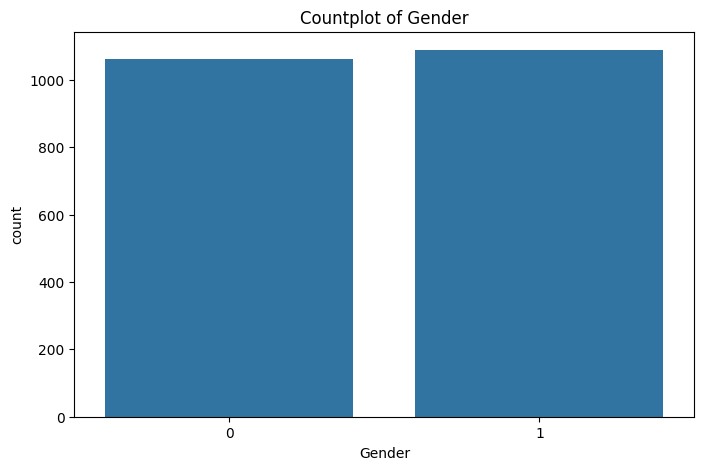

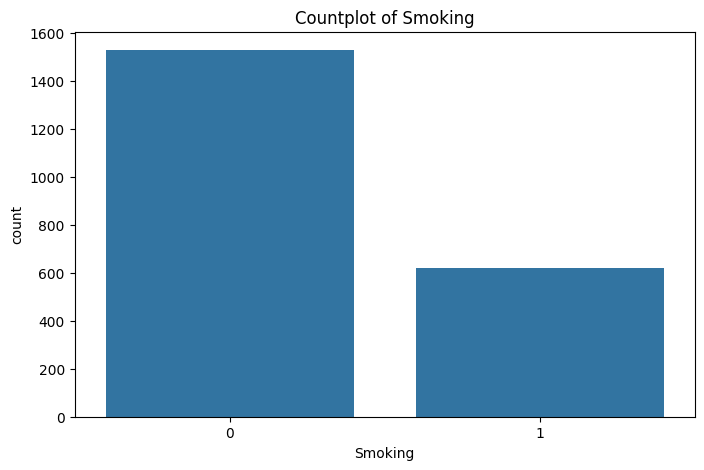

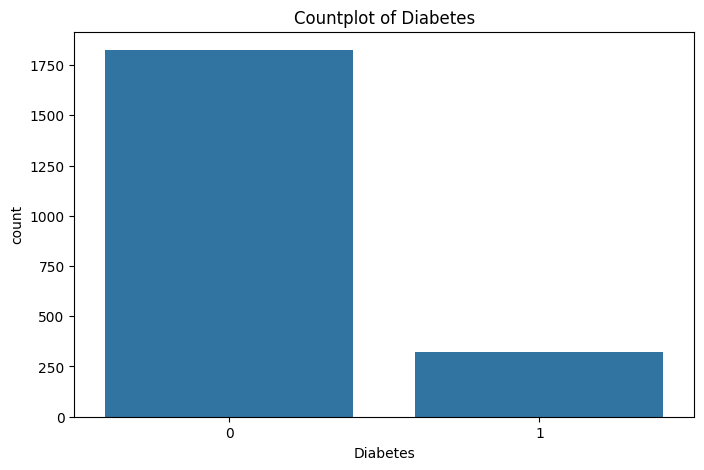

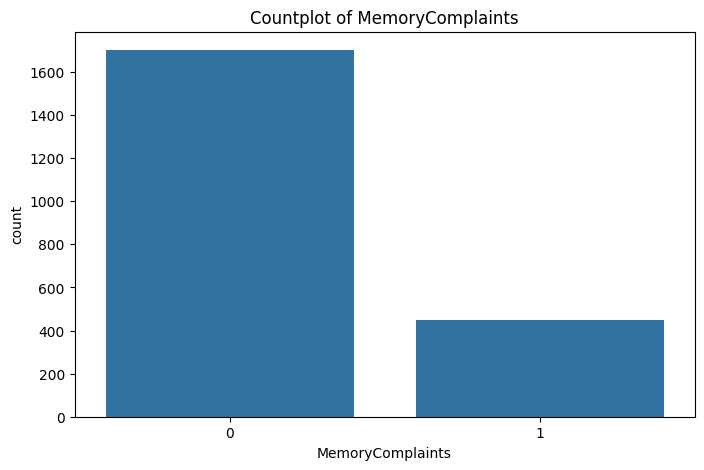

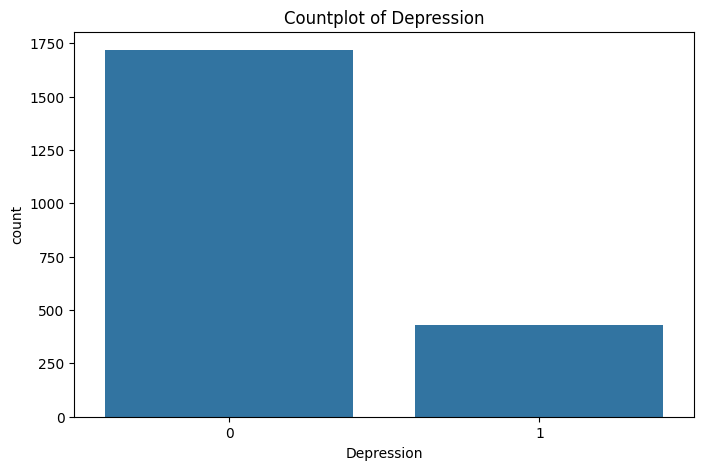

In [ ]:
#selecting specific columns for visualization
columns_to_plot = ['Gender', 'Smoking', 'Diabetes', 'MemoryComplaints', 'Depression']

# Define custom_labels if you want custom labels for any column
custom_labels = {}

for column in columns_to_plot:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')

    if column in custom_labels:
        labels = custom_labels[column]
        ticks = range(len(labels))
        plt.xticks(ticks=ticks, labels=labels)

    plt.show()

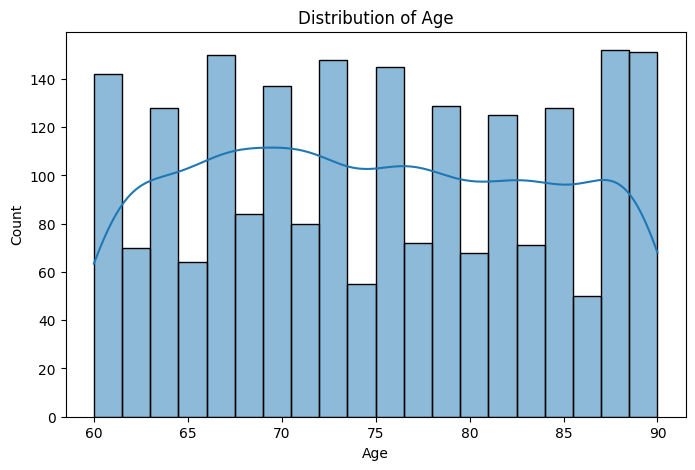

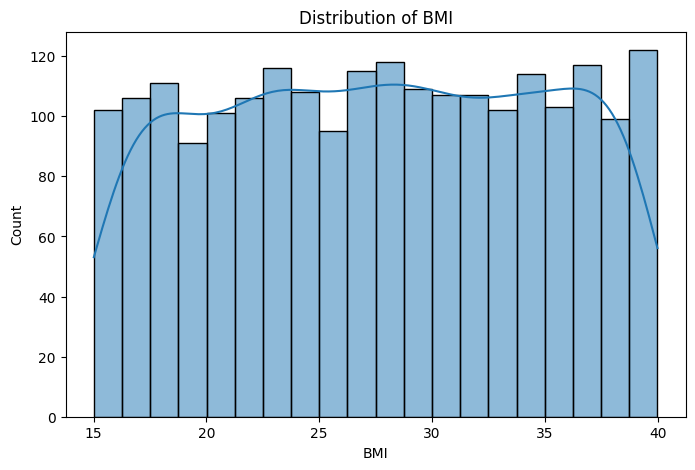

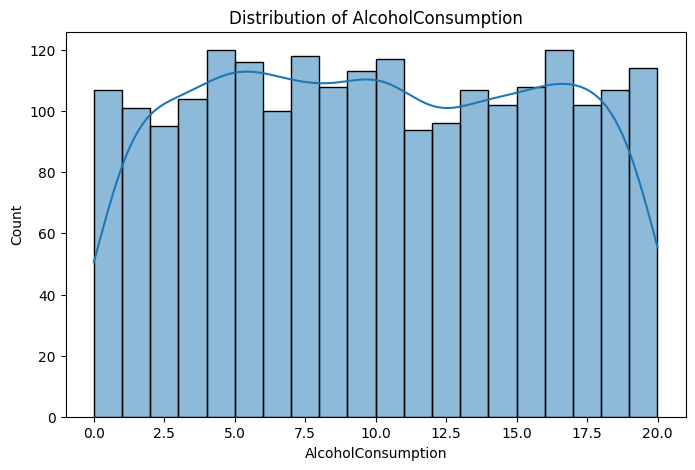

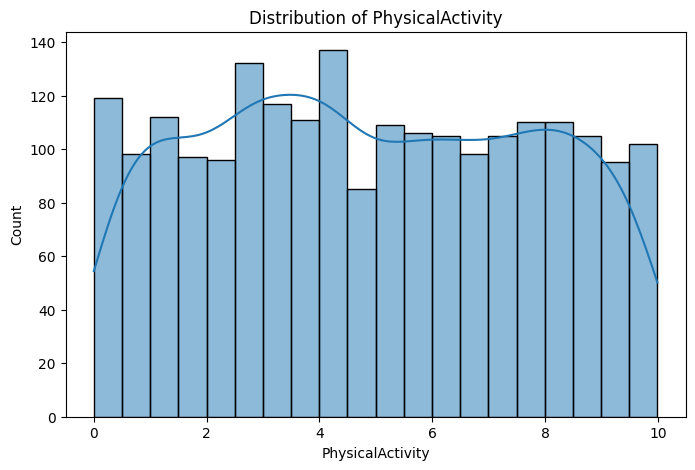

In [ ]:
columns_to_plot = ['Age', 'BMI','AlcoholConsumption',	'PhysicalActivity']

#plot histograms
for column in columns_to_plot:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

Exploring Correlations

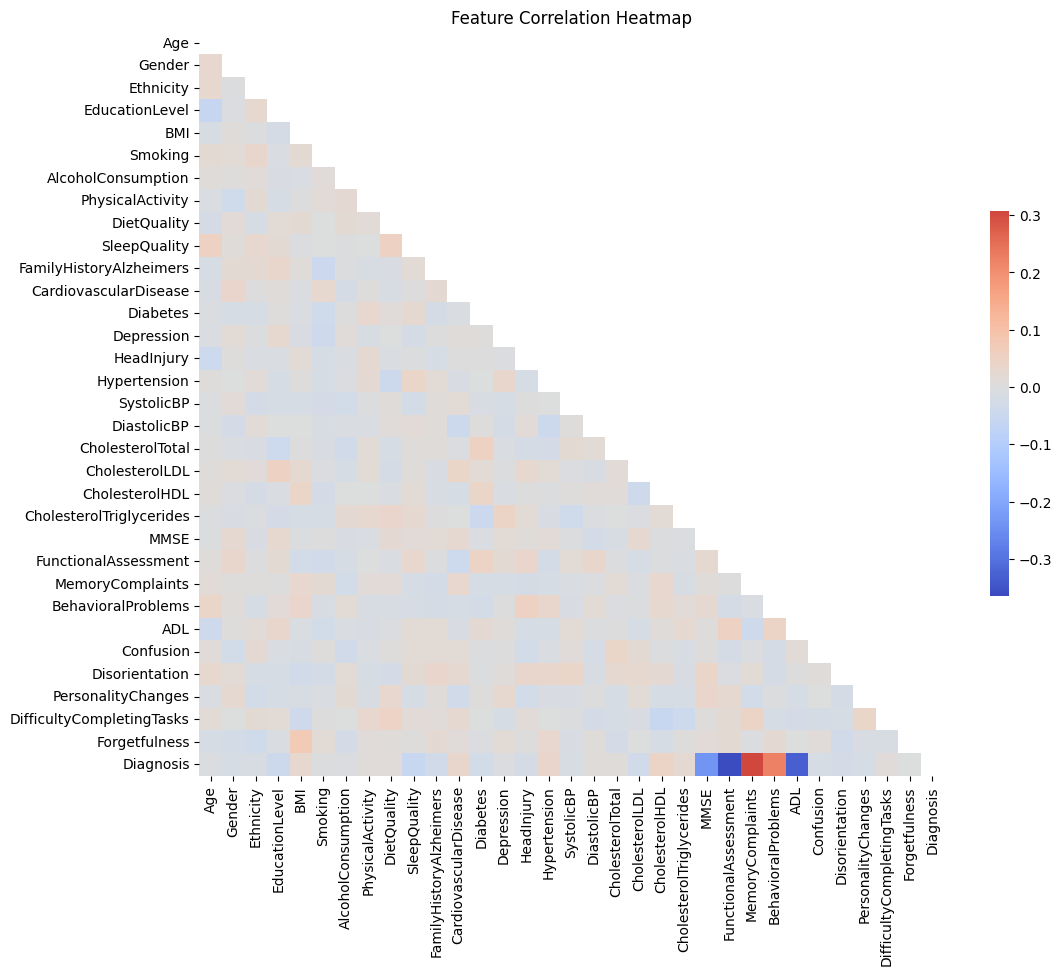

In [ ]:
#correlation matrix
corr_matrix = df.corr()

#mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

#plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", mask=mask,
            cbar_kws={"shrink": 0.5}, square=True, center=0)

plt.title("Feature Correlation Heatmap")
plt.show()

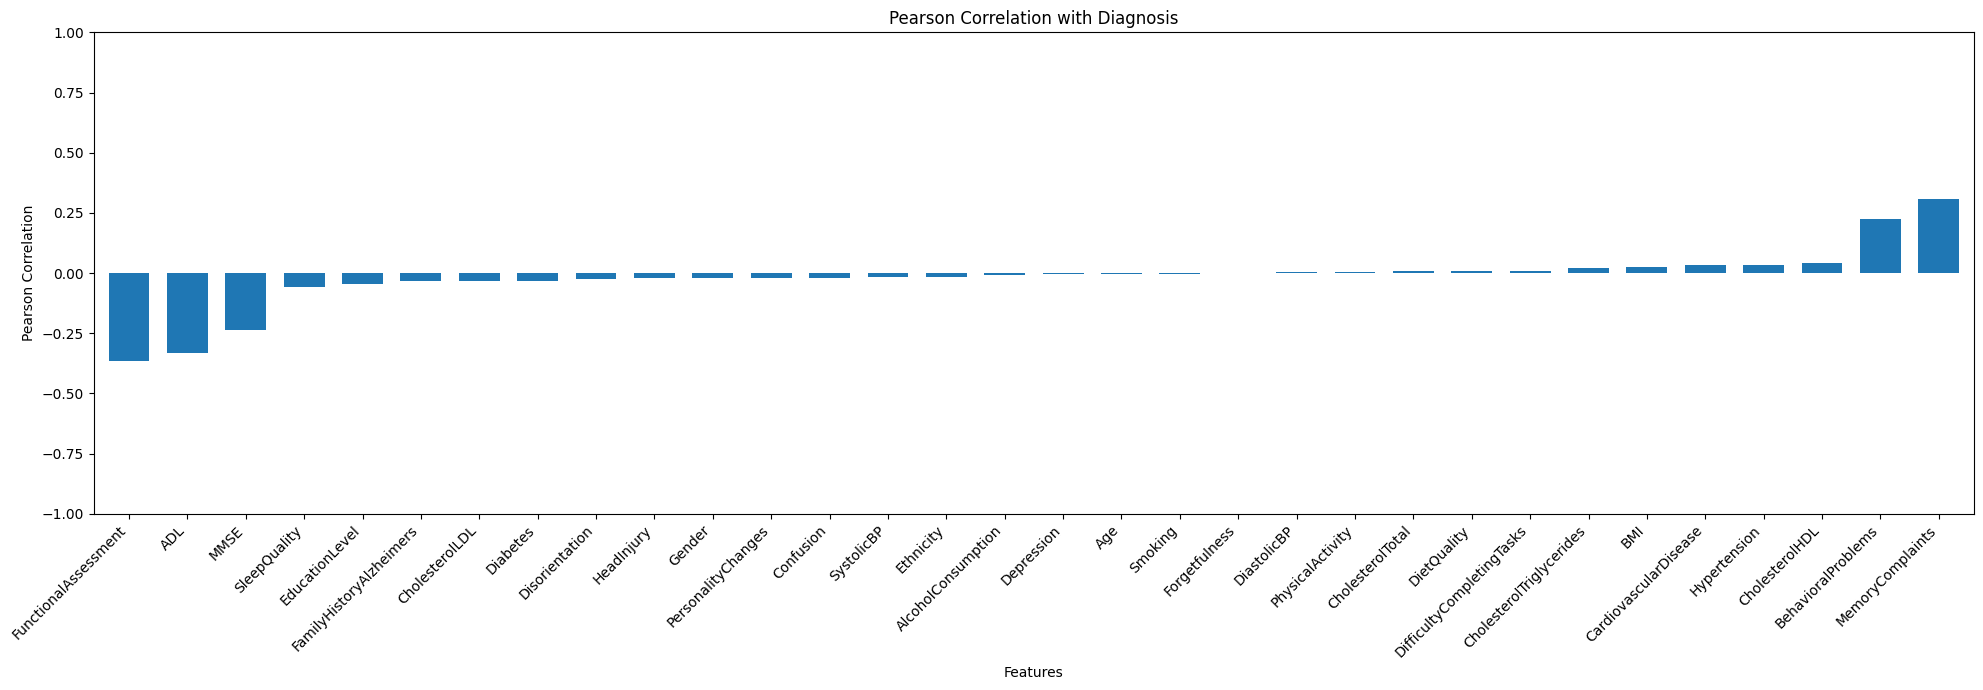

In [ ]:
#Pearson correlation coefficients
correlations = df.corr(numeric_only=True)['Diagnosis'][:-1].sort_values()
plt.figure(figsize=(20, 7))

#bar plot of the Pearson correlation coefficients
ax = correlations.plot(kind='bar', width=0.7)

ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features',
       title='Pearson Correlation with Diagnosis')

#rotating x-axis labels
ax.set_xticklabels(correlations.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

Data Preprocessing

In [ ]:
#unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'Age':
[73 89 74 86 68 75 72 87 78 84 64 69 63 65 82 77 71 83 79 67 66 70 85 60
 88 62 81 61 80 90 76]

Unique values in column 'Gender':
[0 1]

Unique values in column 'Ethnicity':
[0 3 1 2]

Unique values in column 'EducationLevel':
[2 0 1 3]

Unique values in column 'BMI':
[22.92774923 26.82768119 17.79588244 ... 15.47647896 15.29991122
 33.28973831]

Unique values in column 'Smoking':
[0 1]

Unique values in column 'AlcoholConsumption':
[13.29721773  4.54252382 19.55508453 ...  4.59467018  8.67450518
  7.89070315]

Unique values in column 'PhysicalActivity':
[6.32711247 7.61988454 7.84498779 ... 9.88600229 6.35428175 6.57099338]

Unique values in column 'DietQuality':
[1.34721431 0.51876714 1.82633466 ... 8.12002455 1.26342749 7.94140388]

Unique values in column 'SleepQuality':
[9.02567867 7.15129274 9.67357416 ... 5.76946355 8.32287396 9.87871052]

Unique values in column 'FamilyHistoryAlzheimers':
[0 1]

Unique values in column 'CardiovascularDisease':
[0

In [ ]:
#encoding categorical data
categorical_columns = ["Gender", "Ethnicity", "EducationLevel", "Smoking", "AlcoholConsumption",
                       "PhysicalActivity", "DietQuality", "SleepQuality", "FamilyHistoryAlzheimers",
                       "CardiovascularDisease", "Diabetes", "Depression", "HeadInjury", "Hypertension",
                       "MemoryComplaints", "BehavioralProblems", "ADL", "Confusion", "Disorientation",
                       "PersonalityChanges", "DifficultyCompletingTasks", "Forgetfulness"]

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = df[col].astype(str)
    label_encoders[col].fit(df[col])
    df[col] = df[col].apply(lambda x: x if x in label_encoders[col].classes_ else 'unknown')
    df[col] = label_encoders[col].transform(df[col])

In [ ]:
X = df.drop(columns=["Diagnosis"])  #features
y = df["Diagnosis"]  #target variable

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#pca = PCA(n_components=0.95)
#X_pca = pca.fit_transform(X_scaled)

Predictions through Different models

In [ ]:
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#apply StandardScaler
# Drop the 'PatientID' column before scaling if it exists
X_train = X_train.drop(columns=['PatientID', 'DoctorInCharge'], errors='ignore') # Dropping DoctorInCharge column
X_test = X_test.drop(columns=['PatientID', 'DoctorInCharge'], errors='ignore') # Dropping DoctorInCharge column

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train) # Fit on training data only

# Transform the test data using the trained scaler
X_test_scaled = scaler.transform(X_test)

Decision Tree Classifier: a machine learning algorithm that uses a tree-like structure to make predictions by recursively splitting data based on features, ultimately leading to a classification outcome at the leaf nodes.


Without hyperparameter tuning:

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy without tuning:", accuracy_score(y_test, y_pred))

Accuracy without tuning: 0.8837209302325582


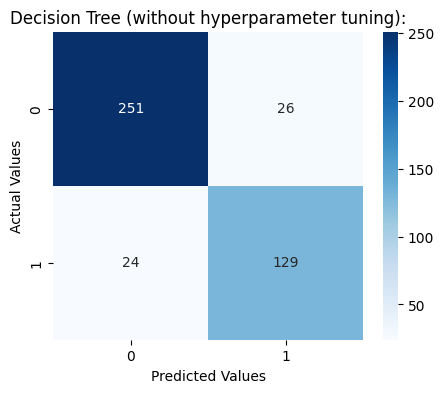

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Decision Tree (without hyperparameter tuning):")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

With hyperparameter tuning:

In [ ]:
param_grid_dt = {'max_depth': [3, 5, 7, 12, None]}

In [ ]:
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='f1')
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 12, None]}, scoring='f1')

In [ ]:
best_dt = grid_search_dt.best_estimator_

In [ ]:
y_pred_dt = best_dt.predict(X_test)

In [ ]:
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       277
           1       0.92      0.87      0.90       153

    accuracy                           0.93       430
   macro avg       0.93      0.91      0.92       430
weighted avg       0.93      0.93      0.93       430



In [ ]:
print("Best Parameters:", grid_search_dt.best_params_)

Best Parameters: {'max_depth': 5}


In [ ]:
print("Accuracy with tuning:", accuracy_score(y_test, y_pred))

Accuracy with tuning: 0.8837209302325582


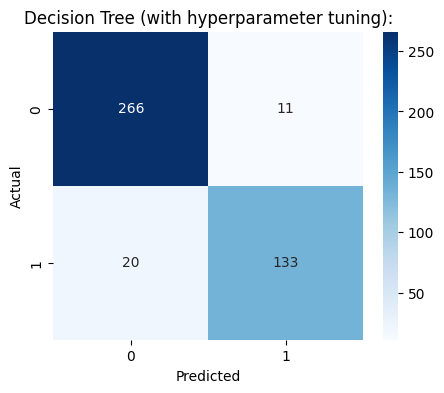

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap="Blues", fmt="d")
plt.title("Decision Tree (with hyperparameter tuning):")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random forest classifier: is an ensemble machine learning algorithm that uses multiple decision trees to classify data by combining their predictions, typically through majority voting.

**Without** hyperparameter tuning:

In [ ]:
model = RandomForestClassifier(class_weight='balanced')

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9325581395348838


In [ ]:
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       277
           1       0.96      0.84      0.90       153

    accuracy                           0.93       430
   macro avg       0.94      0.91      0.92       430
weighted avg       0.93      0.93      0.93       430



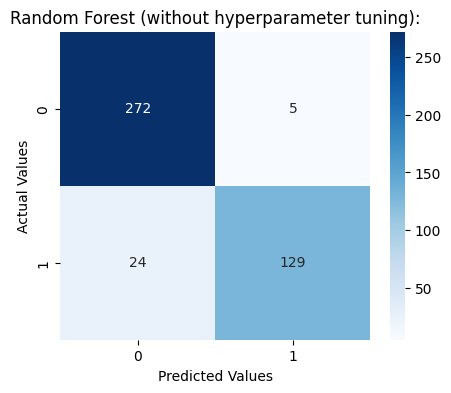

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Random Forest (without hyperparameter tuning):")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [ ]:
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 12, None]}

In [ ]:
grid_search_rf = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid_rf, cv=5, scoring='f1')

In [ ]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [3, 5, 7, 12, None],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [ ]:
best_rf = grid_search_rf.best_estimator_

In [ ]:
y_pred_rf = best_rf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9325581395348838


In [ ]:
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       277
           1       0.94      0.89      0.92       153

    accuracy                           0.94       430
   macro avg       0.94      0.93      0.94       430
weighted avg       0.94      0.94      0.94       430



In [ ]:
print("Best Parameters:", grid_search_rf.best_params_)

Best Parameters: {'max_depth': 5, 'n_estimators': 200}


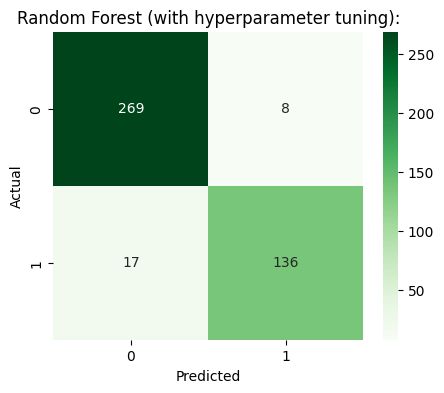

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Greens", fmt="d")
plt.title("Random Forest (with hyperparameter tuning):")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

K-Nearest Neighbors (KNN):a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6697674418604651


In [ ]:
print("KNN Classification Report:\n", classification_report(y_test, y_pred))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.88      0.77       277
           1       0.57      0.29      0.38       153

    accuracy                           0.67       430
   macro avg       0.63      0.58      0.58       430
weighted avg       0.65      0.67      0.64       430



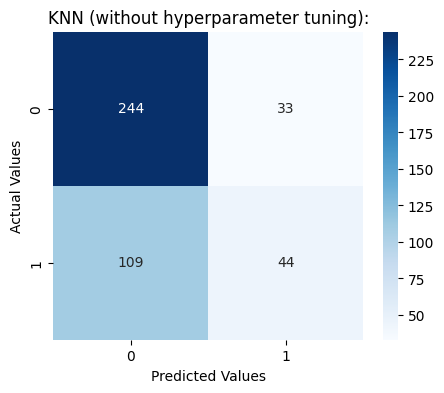

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("KNN (without hyperparameter tuning):")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

With hyper parameter tuning:

In [ ]:
param_grid_knn = {'n_neighbors': [3, 5, 7]}

In [ ]:
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1')

In [ ]:
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7]}, scoring='f1')

In [ ]:
best_knn = grid_search_knn.best_estimator_

In [ ]:
y_pred_knn = best_knn.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6697674418604651


In [ ]:
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.77      0.73       277
           1       0.47      0.36      0.41       153

    accuracy                           0.63       430
   macro avg       0.58      0.57      0.57       430
weighted avg       0.61      0.63      0.61       430



In [ ]:
print("Best Parameters:", grid_search_knn.best_params_)

Best Parameters: {'n_neighbors': 3}


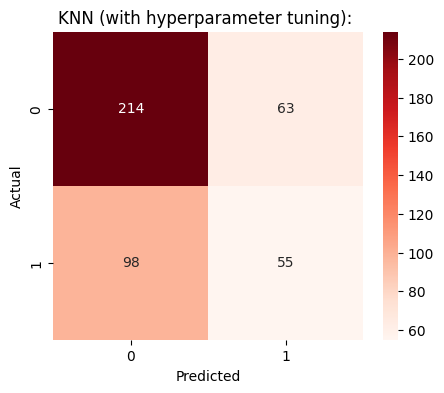

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap="Reds", fmt="d")
plt.title("KNN (with hyperparameter tuning): ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Logistic Regression: a statistical method used for binary classification, predicting the probability of an event occurring based on one or more independent variables, using a sigmoid function to map predictions to probabilities between 0 and 1.


Without hyperparameter tuning:

In [ ]:
model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=5000)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8116279069767441


In [ ]:
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       277
           1       0.71      0.78      0.75       153

    accuracy                           0.81       430
   macro avg       0.79      0.81      0.80       430
weighted avg       0.82      0.81      0.81       430



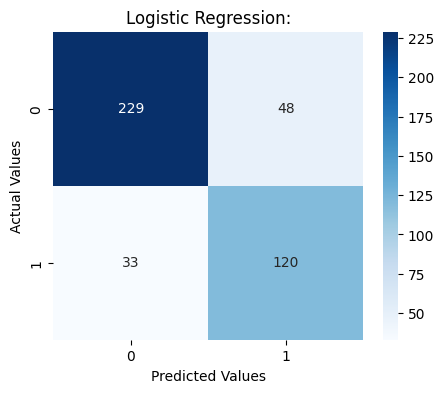

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Logistic Regression:")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

With hyperparameter tuning:

In [ ]:
param_grid_lr = {'C': [0.1, 1, 10]}

In [ ]:
grid_search_lr = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid_lr, cv=5, scoring='f1')
grid_search_lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10]}, scoring='f1')

In [ ]:
best_lr = grid_search_lr.best_estimator_

In [ ]:
y_pred_lr = best_lr.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8116279069767441


In [ ]:
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       277
           1       0.58      0.71      0.64       153

    accuracy                           0.71       430
   macro avg       0.70      0.71      0.70       430
weighted avg       0.73      0.71      0.72       430



In [ ]:
print("Best Parameters:", grid_search_lr.best_params_)

Best Parameters: {'C': 0.1}


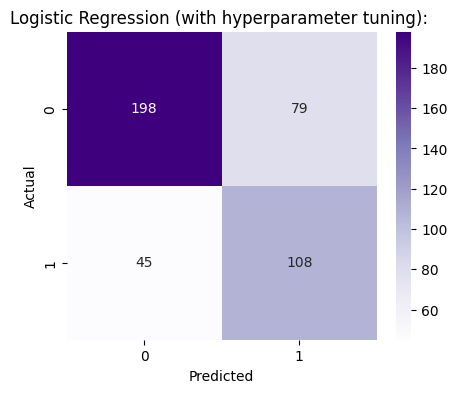

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, cmap="Purples", fmt="d")
plt.title("Logistic Regression (with hyperparameter tuning): ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Support Vector Machine (SVM): a supervised machine learning algorithm that classifies data by finding an optimal line or hyperplane that maximizes the distance between each class in an N-dimensional space

In [ ]:
model = SVC(class_weight='balanced')
model.fit(X_train, y_train)

SVC(class_weight='balanced')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6604651162790698


In [ ]:
print("SVM Classification Report:\n", classification_report(y_test, y_pred))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.66      0.72       277
           1       0.52      0.65      0.58       153

    accuracy                           0.66       430
   macro avg       0.65      0.66      0.65       430
weighted avg       0.68      0.66      0.67       430



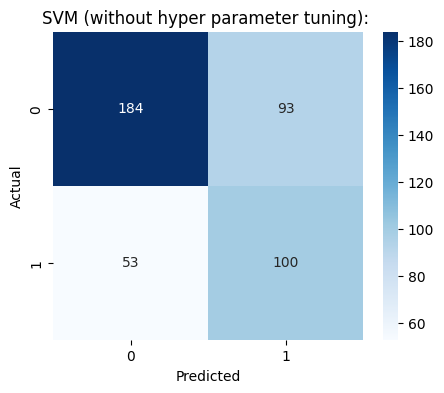

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("SVM (without hyper parameter tuning): ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto']}

In [ ]:
grid_search_svm = GridSearchCV(SVC(class_weight='balanced'), param_grid_svm, cv=5, scoring='f1')
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto']},
             scoring='f1')

In [ ]:
best_svm = grid_search_svm.best_estimator_

In [ ]:
y_pred_svm = best_svm.predict(X_test)

In [ ]:
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.66      0.72       277
           1       0.53      0.70      0.60       153

    accuracy                           0.67       430
   macro avg       0.66      0.68      0.66       430
weighted avg       0.70      0.67      0.68       430



In [ ]:
print("Best Parameters:", grid_search_svm.best_params_)

Best Parameters: {'C': 0.1, 'gamma': 'scale'}


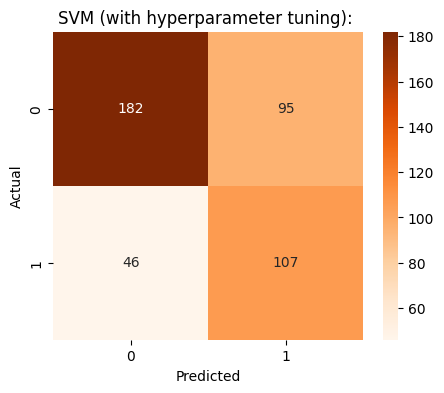

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap="Oranges", fmt="d")
plt.title("SVM (with hyperparameter tuning): ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

XGBoost:

In [ ]:
#XGBoost without hyperparameter tuning
!pip install xgboost
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
#make predictions
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9488372093023256


In [ ]:
#classification report
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       277
           1       0.96      0.90      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430



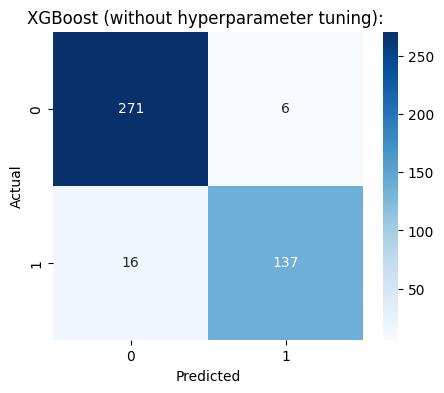

In [ ]:
#plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("XGBoost (without hyperparameter tuning): ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
#for hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.2]
}

In [ ]:
#perform Grid Search
grid_search_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                               param_grid_xgb, cv=5, scoring='f1')
grid_search_xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [ ]:
#getthe best model
best_xgb = grid_search_xgb.best_estimator_

In [ ]:
#make predictions
y_pred_xgb = best_xgb.predict(X_test)

In [ ]:
#classification Report
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       277
           1       0.95      0.92      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430



In [ ]:
print("Best Parameters:", grid_search_xgb.best_params_)

Best Parameters: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}


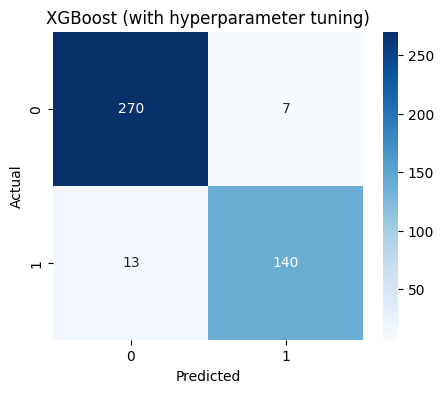

In [ ]:
#plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, cmap="Blues", fmt="d")
plt.title("XGBoost (with hyperparameter tuning)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Comparing All Models

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


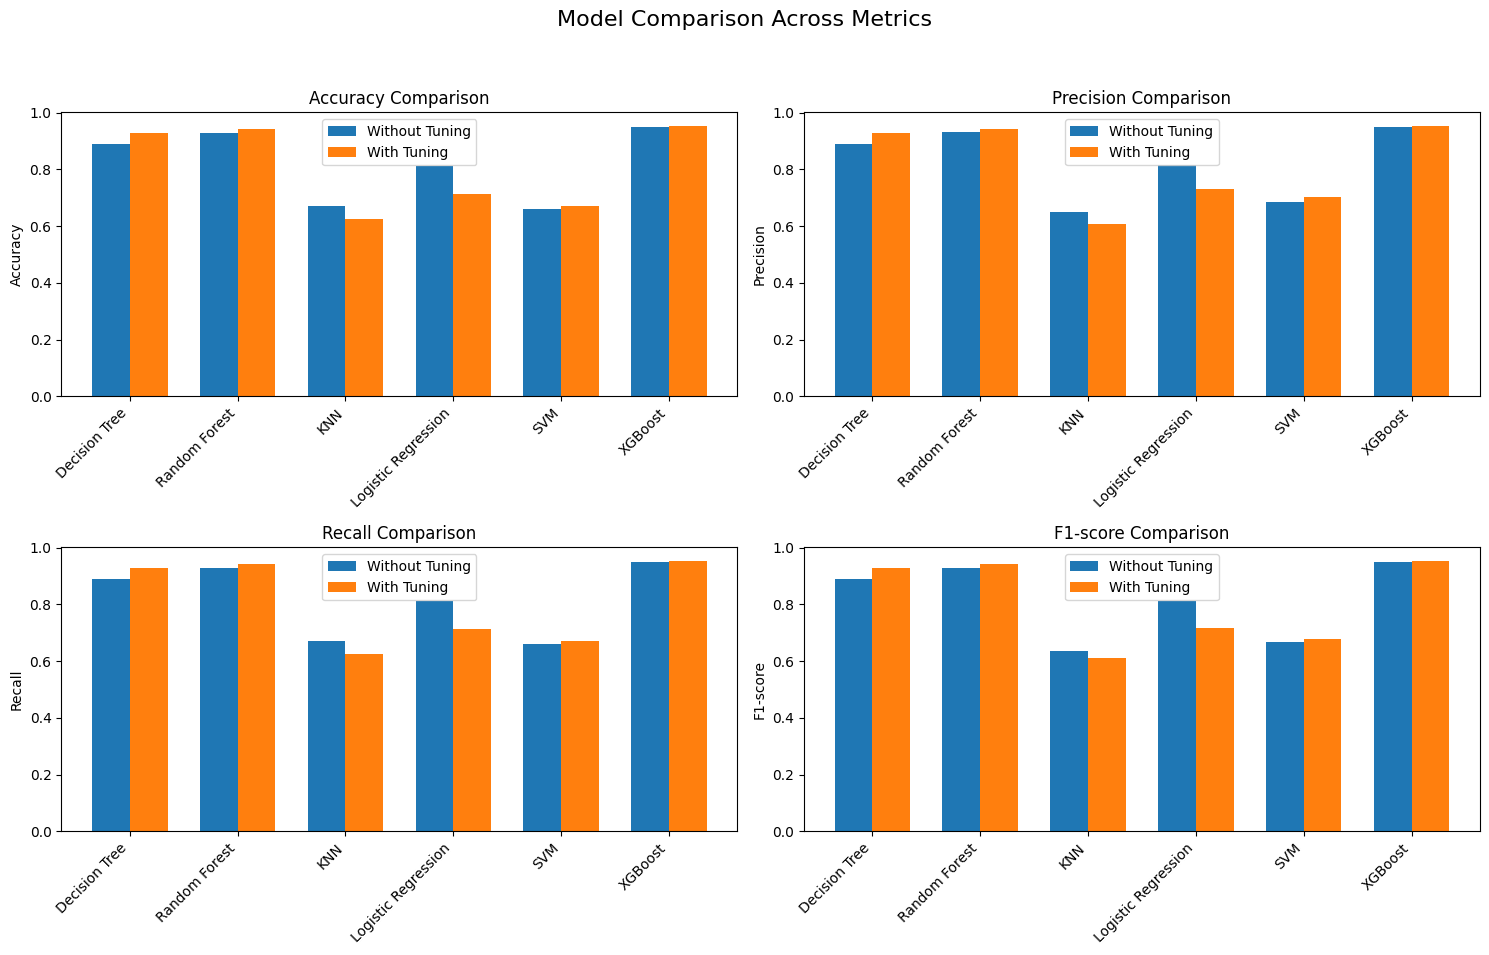

In [ ]:
models = ['Decision Tree', 'Random Forest', 'KNN', 'Logistic Regression', 'SVM', 'XGBoost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Store scores for each model and metric
scores = {model: {metric: [] for metric in metrics} for model in models}

# Define a dictionary to map model names to their corresponding model objects
model_objects = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'KNN': KNeighborsClassifier(n_neighbors=6),
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced', max_iter=5000),
    'SVM': SVC(class_weight='balanced'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

best_model_objects = { #defining the best model variables
    'Decision Tree': best_dt,
    'Random Forest': best_rf,
    'KNN': best_knn,
    'Logistic Regression': best_lr,
    'SVM': best_svm,
    'XGBoost': best_xgb
}

for model_name in models:
    # Without tuning
    model = model_objects[model_name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    scores[model_name]['Accuracy'].append(accuracy_score(y_test, y_pred))
    scores[model_name]['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    scores[model_name]['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    scores[model_name]['F1-score'].append(f1_score(y_test, y_pred, average='weighted'))

    # With tuning
    best_model = best_model_objects[model_name]
    y_pred_best = best_model.predict(X_test)

    scores[model_name]['Accuracy'].append(accuracy_score(y_test, y_pred_best))
    scores[model_name]['Precision'].append(precision_score(y_test, y_pred_best, average='weighted'))
    scores[model_name]['Recall'].append(recall_score(y_test, y_pred_best, average='weighted'))
    scores[model_name]['F1-score'].append(f1_score(y_test, y_pred_best, average='weighted'))

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # Create 2x2 subplots
fig.suptitle('Model Comparison Across Metrics', fontsize=16)  # Main title

# Flatten axes for easier iteration
axes = axes.flatten()

for i, metric in enumerate(metrics):
    values_without_tuning = [scores[model][metric][0] for model in models]
    values_with_tuning = [scores[model][metric][1] for model in models]

    x = np.arange(len(models))  # the label locations
    width = 0.35  # the width of the bars

    # Plot bars for without tuning
    axes[i].bar(x - width/2, values_without_tuning, width, label='Without Tuning')

    # Plot bars for with tuning
    axes[i].bar(x + width/2, values_with_tuning, width, label='With Tuning')

    axes[i].set_ylabel(metric)  # Set y-axis label for each subplot
    axes[i].set_title(f'{metric} Comparison')  # Set title for each subplot
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(models, rotation=45, ha='right')
    axes[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for main title
plt.show()

In [ ]:
models = ['Decision Tree', 'Random Forest', 'KNN', 'Logistic Regression', 'SVM', 'XGBoost']

# Define a dictionary to map model names to their corresponding model objects
model_objects = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'KNN': KNeighborsClassifier(n_neighbors=6),
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced', max_iter=5000),
    'SVM': SVC(class_weight='balanced'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

best_model_objects = { #defining the best model variables
    'Decision Tree': best_dt,
    'Random Forest': best_rf,
    'KNN': best_knn,
    'Logistic Regression': best_lr,
    'SVM': best_svm,
    'XGBoost': best_xgb
}

data = []

for model_name in models:
    # Without tuning
    model = model_objects[model_name] # Get the model object from the dictionary
    model.fit(X_train, y_train) #fitting the models if not done already
    y_pred = model.predict(X_test)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    data.append([model_name, 'Without Tuning', accuracy, precision, recall, f1, support])

    # With tuning
    best_model = best_model_objects[model_name]  # Get the best model object from the dictionary
    y_pred_best = best_model.predict(X_test)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_best, average='weighted')
    accuracy = accuracy_score(y_test, y_pred_best)
    data.append([model_name, 'With Tuning', accuracy, precision, recall, f1, support])

# Create the DataFrame
columns = ['Model', 'Tuning', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'Support']
df_results = pd.DataFrame(data, columns=columns)

# Display the table
display(df_results)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Tuning,Accuracy,Precision,Recall,F1-score,Support
0,Decision Tree,Without Tuning,0.879070,0.878750,0.879070,0.878889,None
1,Decision Tree,With Tuning,0.927907,0.927772,0.927907,0.927391,None
2,Random Forest,Without Tuning,0.923256,0.926191,0.923256,0.921667,None
3,Random Forest,With Tuning,0.941860,0.941942,0.941860,0.941444,None
4,KNN,Without Tuning,0.669767,0.648595,0.669767,0.635126,None
5,KNN,With Tuning,0.625581,0.607691,0.625581,0.612528,None
6,Logistic Regression,Without Tuning,0.811628,0.817201,0.811628,0.813408,None
7,Logistic Regression,With Tuning,0.711628,0.730389,0.711628,0.716619,None
8,SVM,Without Tuning,0.660465,0.684487,0.660465,0.666880,None
9,SVM,With Tuning,0.672093,0.702694,0.672093,0.678815,None


XGBoost gives the best output.

In [ ]:
import pickle
with open("xgb_model.pkl", "wb") as file:
    pickle.dump(best_xgb, file)

In [ ]:
import pickle
import numpy as np
import pandas as pd

#load the saved XGBoost model
with open("xgb_model.pkl", "rb") as file:
    xgb_model = pickle.load(file)

#loaddataset to get mean values for missing features
df = pd.read_csv("alzheimers_disease_data.csv")

#features used during model training
model_features = [
    'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
    'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
    'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers',
    'CardiovascularDisease', 'Diabetes', 'Depression',
    'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
    'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
    'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
    'MemoryComplaints', 'BehavioralProblems', 'ADL',
    'Confusion', 'Disorientation', 'PersonalityChanges',
    'DifficultyCompletingTasks', 'Forgetfulness'
]

#mapping of features
feature_mapping = {
    "Age": "Age",
    "Gender (0=Female, 1=Male)": "Gender",
    "Smoking Status (0=No, 1=Yes)": "Smoking",
    "Alcohol Consumption (0=No, 1=Yes)": "AlcoholConsumption",
    "Physical Activity (0=No, 1=Yes)": "PhysicalActivity",
    "Family History of Alzheimer's (0=No, 1=Yes)": "FamilyHistoryAlzheimers",
    "Cardiovascular Disease (0=No, 1=Yes)": "CardiovascularDisease",
    "Diabetes (0=No, 1=Yes)": "Diabetes",
    "Depression (0=No, 1=Yes)": "Depression",
    "Head Injury (0=No, 1=Yes)": "HeadInjury",
    "Hypertension (0=No, 1=Yes)": "Hypertension",
    "Memory Complaints (0=No, 1=Yes)": "MemoryComplaints",
    "Behavioral Problems (0=No, 1=Yes)": "BehavioralProblems",
    "Confusion (0=No, 1=Yes)": "Confusion",
    "Disorientation (0=No, 1=Yes)": "Disorientation",
    "Personality Changes (0=No, 1=Yes)": "PersonalityChanges",
    "Difficulty Completing Tasks (0=No, 1=Yes)": "DifficultyCompletingTasks",
    "Forgetfulness (0=No, 1=Yes)": "Forgetfulness",
    "BMI": "BMI",
    "Blood Pressure Level (0=Normal, 1=High)": "BloodPressureLevel",
    "Cholesterol Level (0=Normal, 1=High)": "CholesterolLevel",
    "Diet Quality (Rate from 1-10)": "DietQuality",
    "Sleep Quality (Rate from 1-10)": "SleepQuality",
    "Ease to perform Activities of Daily Living (ADL) (Rate from 1-10)": "ADL"
}

def predict_disease():
    default_values = {}
    for feature in model_features:
        default_values[feature] = df[feature].mean()
    user_input_dict = {}
    for feature, dataset_feature in feature_mapping.items():
        while True:
            try:
                if "Rate from 1-10" in feature:
                    value = int(input(f"Rate {feature} (1-10): "))
                    if value < 1 or value > 10:
                        print("Please enter a number between 1 and 10.")
                        continue
                else:
                    value = float(input(f"Enter {feature}: "))
                user_input_dict[dataset_feature] = value
                break
            except ValueError:
                print("Invalid input. Please enter a number.")

    if "BloodPressureLevel" in user_input_dict:
        bp_level = user_input_dict.pop("BloodPressureLevel")
        if bp_level == 1:  #high
            default_values["SystolicBP"] = df["SystolicBP"].quantile(0.75)
            default_values["DiastolicBP"] = df["DiastolicBP"].quantile(0.75)
        else:  #normal bp
            default_values["SystolicBP"] = df["SystolicBP"].quantile(0.25)
            default_values["DiastolicBP"] = df["DiastolicBP"].quantile(0.25)

    if "CholesterolLevel" in user_input_dict:
        chol_level = user_input_dict.pop("CholesterolLevel")
        if chol_level == 1:  #high
            default_values["CholesterolTotal"] = df["CholesterolTotal"].quantile(0.75)
            default_values["CholesterolLDL"] = df["CholesterolLDL"].quantile(0.75)
            default_values["CholesterolTriglycerides"] = df["CholesterolTriglycerides"].quantile(0.75)
            default_values["CholesterolHDL"] = df["CholesterolHDL"].quantile(0.25)
        else:  #normal
            default_values["CholesterolTotal"] = df["CholesterolTotal"].quantile(0.25)
            default_values["CholesterolLDL"] = df["CholesterolLDL"].quantile(0.25)
            default_values["CholesterolTriglycerides"] = df["CholesterolTriglycerides"].quantile(0.25)
            default_values["CholesterolHDL"] = df["CholesterolHDL"].quantile(0.75)

    default_values.update(user_input_dict)
    input_df = pd.DataFrame([default_values])
    input_df = input_df[model_features]
    missing_cols = set(model_features) - set(input_df.columns)
    if missing_cols:
        print(f"Missing columns: {missing_cols}")

    prediction = xgb_model.predict(input_df)
    result = "Disease detected!" if prediction[0] == 1 else "No disease detected!"
    print("\nAlzheimer's Disease Prediction Result:")
    print(result)
if __name__ == "__main__":
    predict_disease()

KeyboardInterrupt: Interrupted by user